In [1]:
#bach
! curl "https://raw.githubusercontent.com/TCDigitalSW/xmu/main/test.png" --output test.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  310k  100  310k    0     0  1004k      0 --:--:-- --:--:-- --:--:-- 1004k


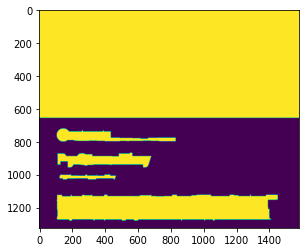

[      0       0    1582     655 1036210]
[   108   1122   1345    158 188993]


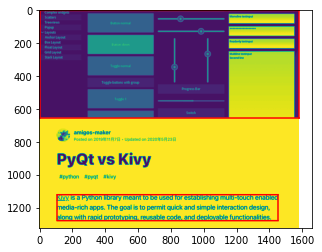

In [2]:
import cv2 as cv
import matplotlib as mpl                  
import matplotlib.pyplot as plt
import numpy as np 

# 图片URl： https://raw.githubusercontent.com/TCDigitalSW/xmu/main/test.png
img = cv.imread("./test.png", 0)
_, img2 = cv.threshold(img,254,255,cv.THRESH_BINARY_INV)

kernel = np.ones((5,5), np.uint8)
dilation = cv.dilate(img2,kernel,iterations = 10)
dilation = cv.erode(dilation,kernel,iterations = 10)

ret, labels, stats, centroid = cv.connectedComponentsWithStats(dilation, 4)
sortedStats = sorted(stats[1:], key = lambda s : s[-1], reverse = True)

plt.imshow(dilation)
plt.show()
plt.imshow(img)

for item in sortedStats[0:2]:
    print(item)
    x1 = np.arange(item[0], item[0] + item[2])
    y2 = np.ones(item[2])*item[1];
    y3 = np.ones(item[2])*(item[1]+item[3]);

    y4 = np.arange(item[1], item[1]+item[3])
    x2 = np.ones(item[3])*item[0];
    x3 = np.ones(item[3])*(item[0]+item[2]);

    plt.plot(x1, y2, 'r')
    plt.plot(x1, y3, 'r')
    plt.plot(x2, y4, 'r')
    plt.plot(x3, y4, 'r')
